In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
import pandas_profiling as pp

Adapted from: https://medium.com/@williamkoehrsen/data-analysis-with-python-19434f5d6324

In [3]:
# load csv files
pitching = pd.read_csv('./core/Pitching.csv')
pitching.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,0,792,361,132,4,37,13,NaN,4.50,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,1,0,639,295,103,3,31,15,NaN,4.35,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,0,0,27,20,10,0,3,0,NaN,10.00,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [4]:
# extract specific data from loaded csv's
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
pitching_by_years = pitching[pitching['yearID'].isin(years)]

In [5]:
pitching_by_years = pitching_by_years.groupby(['playerID', 'yearID', 'teamID'], as_index=False).sum()
pitching_by_years.head(20)

,playerID,yearID,teamID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,aardsda01,2007,CHA,1,2,1,25,0,0,0,0,97,39,23,4,17,36,0.300,6.40,3.0,2,1.0,0,151.0,7,24,2.0,1.0,1.0
1,aardsda01,2008,BOS,1,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,7,32,3.0,2.0,4.0
2,aardsda01,2009,SEA,1,3,6,73,0,0,0,38,214,49,20,4,34,80,0.190,2.52,3.0,2,0.0,0,296.0,53,23,2.0,1.0,2.0
3,aardsda01,2010,SEA,1,0,6,53,0,0,0,31,149,33,19,5,25,49,0.198,3.44,5.0,2,2.0,0,202.0,43,19,7.0,1.0,5.0
4,aardsda01,2012,NYA,1,0,0,1,0,0,0,0,3,1,1,1,1,1,0.250,9.00,0.0,0,0.0,0,5.0,1,1,0.0,0.0,0.0
5,aardsda01,2013,NYN,1,2,2,43,0,0,0,0,119,39,19,7,19,36,0.257,4.31,6.0,1,4.0,1,178.0,7,20,2.0,1.0,2.0
6,aardsda01,2015,ATL,1,1,1,33,0,0,0,0,92,25,16,6,14,35,0.223,4.70,3.0,1,1.0,0,129.0,9,17,0.0,1.0,4.0
7,abadfe01,2010,HOU,1,0,1,22,0,0,0,0,57,14,6,3,5,12,0.200,2.84,0.0,0,0.0,0,76.0,6,6,0.0,1.0,0.0
8,abadfe01,2011,HOU,1,1,4,29,0,0,0,0,59,28,16,5,9,15,0.326,7.32,0.0,0,1.0,0,99.0,1,18,1.0,2.0,0.0
9,abadfe01,2012,HOU,1,0,6,37,6,0,0,0,138,57,26,6,19,38,0.311,5.09,1.0,4,3.0,0,208.0,8,27,2.0,1.0,4.0


In [6]:
pitching_by_years.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000,8202.000000
mean,2012.181297,1.084492,3.258352,3.258352,26.027310,6.516947,0.165082,0.073031,1.654353,174.645696,57.259449,26.618142,6.638259,20.506096,48.106194,0.267970,5.256123,1.483784,2.225799,2.172397,0.200683,248.794806,6.351865,28.828091,1.861375,1.716654,5.013655
std,3.200518,0.292667,4.122729,3.633119,21.057067,10.601586,0.634004,0.335527,6.442670,175.107850,57.445066,26.117165,7.098878,19.043152,49.961830,0.081264,6.066099,1.784594,2.660477,2.636916,0.520015,244.777930,10.542431,28.230663,2.488833,2.004978,5.727891
min,2007.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,1.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,42.000000,15.000000,8.000000,2.000000,6.000000,10.000000,0.230000,3.170000,0.000000,0.000000,0.000000,0.000000,62.000000,0.000000,8.000000,0.000000,0.000000,1.000000
50%,2012.000000,1.000000,2.000000,2.000000,21.500000,0.000000,0.000000,0.000000,0.000000,118.000000,38.000000,18.000000,4.000000,15.000000,32.000000,0.261000,4.250000,1.000000,1.000000,1.000000,0.000000,172.000000,2.000000,19.000000,1.000000,1.000000,3.000000
75%,2015.000000,1.000000,5.000000,5.000000,35.000000,10.000000,0.000000,0.000000,0.000000,220.750000,72.000000,35.000000,9.000000,28.000000,67.000000,0.297000,5.760000,2.000000,3.000000,3.000000,0.000000,311.000000,8.000000,37.000000,3.000000,3.000000,7.000000
max,2017.000000,6.000000,24.000000,19.000000,92.000000,35.000000,11.000000,6.000000,62.000000,753.000000,262.000000,126.000000,46.000000,108.000000,308.000000,1.000000,189.000000,13.000000,25.000000,19.000000,6.000000,1001.000000,71.000000,134.000000,19.000000,14.000000,36.000000


In [7]:
pitching_by_years.shape

(8202, 29)

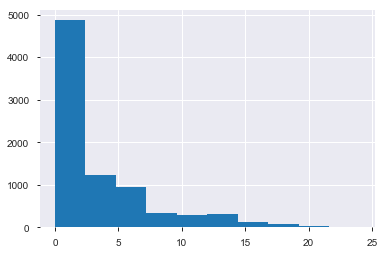

In [8]:
pitching_by_years['W'].hist()

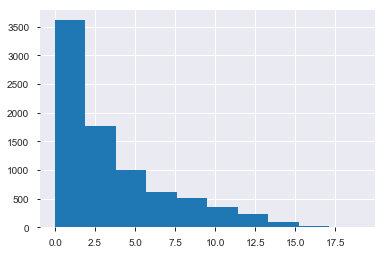

In [11]:
pitching_by_years['L'].hist()

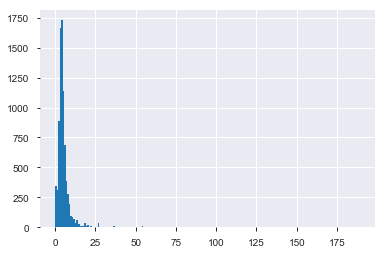

In [18]:
pitching_by_years['ERA'].hist(bins=200)

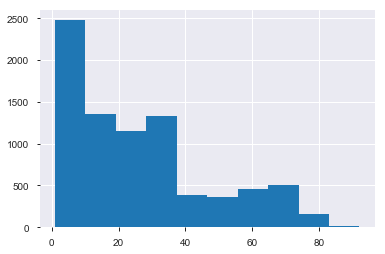

In [9]:
pitching_by_years['G'].hist()

In [19]:
# filter to include only players with more than 20 games played and 20 at-bats
pitching_by_years = pitching_by_years[(pitching_by_years['G'] >= 20) & 
                                    (pitching_by_years['ERA'] >= 0)]
pitching_by_years.head(20)

,playerID,yearID,teamID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,aardsda01,2007,CHA,1,2,1,25,0,0,0,0,97,39,23,4,17,36,0.300,6.40,3.0,2,1.0,0,151.0,7,24,2.0,1.0,1.0
1,aardsda01,2008,BOS,1,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,7,32,3.0,2.0,4.0
2,aardsda01,2009,SEA,1,3,6,73,0,0,0,38,214,49,20,4,34,80,0.190,2.52,3.0,2,0.0,0,296.0,53,23,2.0,1.0,2.0
3,aardsda01,2010,SEA,1,0,6,53,0,0,0,31,149,33,19,5,25,49,0.198,3.44,5.0,2,2.0,0,202.0,43,19,7.0,1.0,5.0
5,aardsda01,2013,NYN,1,2,2,43,0,0,0,0,119,39,19,7,19,36,0.257,4.31,6.0,1,4.0,1,178.0,7,20,2.0,1.0,2.0
6,aardsda01,2015,ATL,1,1,1,33,0,0,0,0,92,25,16,6,14,35,0.223,4.70,3.0,1,1.0,0,129.0,9,17,0.0,1.0,4.0
7,abadfe01,2010,HOU,1,0,1,22,0,0,0,0,57,14,6,3,5,12,0.200,2.84,0.0,0,0.0,0,76.0,6,6,0.0,1.0,0.0
8,abadfe01,2011,HOU,1,1,4,29,0,0,0,0,59,28,16,5,9,15,0.326,7.32,0.0,0,1.0,0,99.0,1,18,1.0,2.0,0.0
9,abadfe01,2012,HOU,1,0,6,37,6,0,0,0,138,57,26,6,19,38,0.311,5.09,1.0,4,3.0,0,208.0,8,27,2.0,1.0,4.0
10,abadfe01,2013,WAS,1,0,3,39,0,0,0,0,113,42,14,3,10,32,0.271,3.35,0.0,0,1.0,0,166.0,17,14,0.0,0.0,0.0


In [10]:
# # define a function that makes sure that only players that are in all five years are included
# def find_players_in_all_years(records):
#     # create list with all playerID's
#     list_of_IDs = list(records['playerID'])
#     all_years = set()
    
#     # iterate through list of ID's and count how many times it occurs in the list
#     for player in list_of_IDs:
#         if (list_of_IDs.count(player)) == len(years):
#             all_years.add(player)
            
#     # return dataframe with players in all desired years
#     return records[records['playerID'].isin(all_years)]


In [11]:
# create new dataframe using above function
# batting_by_years_agg = find_players_in_all_years(batting_by_years)
# batting_by_years_agg.head(20)

In [20]:
pitching_by_years.shape

(4375, 29)

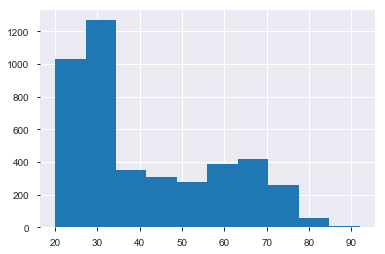

In [21]:
pitching_by_years['G'].hist()

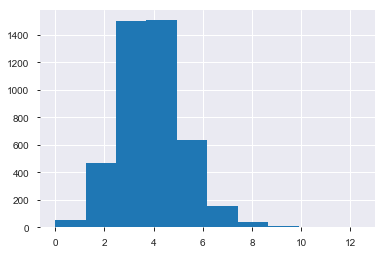

In [23]:
pitching_by_years['ERA'].hist()

In [15]:
# sns.pairplot(batting_by_years_agg)

In [24]:
# import people csv
people = pd.read_csv('../baseballdatabank/core/People.csv',
                    usecols=['playerID','nameFirst','nameLast',
                            'bats','throws','debut'])

In [25]:
# set index so that we can join with batting data
people.set_index('playerID', inplace=True)

In [26]:
# join batting dataframe with other relavent info from people
pitching_by_years = pitching_by_years.join(people, on='playerID', how='inner')

In [27]:
pitching_by_years.isnull().sum()

playerID     0
yearID       0
teamID       0
stint        0
W            0
L            0
G            0
GS           0
CG           0
SHO          0
SV           0
IPouts       0
H            0
ER           0
HR           0
BB           0
SO           0
BAOpp        0
ERA          0
IBB          0
WP           0
HBP          0
BK           0
BFP          0
GF           0
R            0
SH           0
SF           0
GIDP         0
nameFirst    0
nameLast     0
bats         0
throws       0
debut        0
dtype: int64

In [28]:
# create function that converts the bats and throws columns to numeric
def bats_throws(col):
    if col =='R':
        return 1
    else:
        return 0

In [29]:
# convert bats and throws columns
pitching_by_years['throws_R'] = pitching_by_years['throws'].apply(bats_throws)
pitching_by_years['bats_R'] = pitching_by_years['bats'].apply(bats_throws)
pitching_by_years.head()

,playerID,yearID,teamID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R
0,aardsda01,2007,CHA,1,2,1,25,0,0,0,0,97,39,23,4,17,36,0.300,6.40,3.0,2,1.0,0,151.0,7,24,2.0,1.0,1.0,David,Aardsma,R,R,2004-04-06,1,1
1,aardsda01,2008,BOS,1,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,7,32,3.0,2.0,4.0,David,Aardsma,R,R,2004-04-06,1,1
2,aardsda01,2009,SEA,1,3,6,73,0,0,0,38,214,49,20,4,34,80,0.190,2.52,3.0,2,0.0,0,296.0,53,23,2.0,1.0,2.0,David,Aardsma,R,R,2004-04-06,1,1
3,aardsda01,2010,SEA,1,0,6,53,0,0,0,31,149,33,19,5,25,49,0.198,3.44,5.0,2,2.0,0,202.0,43,19,7.0,1.0,5.0,David,Aardsma,R,R,2004-04-06,1,1
5,aardsda01,2013,NYN,1,2,2,43,0,0,0,0,119,39,19,7,19,36,0.257,4.31,6.0,1,4.0,1,178.0,7,20,2.0,1.0,2.0,David,Aardsma,R,R,2004-04-06,1,1


In [30]:
from datetime import datetime

In [31]:
# convert debut to datetime
pitching_by_years['debut'] = pd.to_datetime(pitching_by_years['debut'])

In [32]:
# create new columns for debutYear and finalYear 
pitching_by_years['debutYear'] = pd.to_numeric(pitching_by_years['debut'].dt.strftime('%Y'), errors='coerce')
pitching_by_years['currentYear'] = pitching_by_years['yearID'] 
pitching_by_years.head(20)

,playerID,yearID,teamID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,debutYear,currentYear
0,aardsda01,2007,CHA,1,2,1,25,0,0,0,0,97,39,23,4,17,36,0.300,6.40,3.0,2,1.0,0,151.0,7,24,2.0,1.0,1.0,David,Aardsma,R,R,2004-04-06,1,1,2004,2007
1,aardsda01,2008,BOS,1,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,7,32,3.0,2.0,4.0,David,Aardsma,R,R,2004-04-06,1,1,2004,2008
2,aardsda01,2009,SEA,1,3,6,73,0,0,0,38,214,49,20,4,34,80,0.190,2.52,3.0,2,0.0,0,296.0,53,23,2.0,1.0,2.0,David,Aardsma,R,R,2004-04-06,1,1,2004,2009
3,aardsda01,2010,SEA,1,0,6,53,0,0,0,31,149,33,19,5,25,49,0.198,3.44,5.0,2,2.0,0,202.0,43,19,7.0,1.0,5.0,David,Aardsma,R,R,2004-04-06,1,1,2004,2010
5,aardsda01,2013,NYN,1,2,2,43,0,0,0,0,119,39,19,7,19,36,0.257,4.31,6.0,1,4.0,1,178.0,7,20,2.0,1.0,2.0,David,Aardsma,R,R,2004-04-06,1,1,2004,2013
6,aardsda01,2015,ATL,1,1,1,33,0,0,0,0,92,25,16,6,14,35,0.223,4.70,3.0,1,1.0,0,129.0,9,17,0.0,1.0,4.0,David,Aardsma,R,R,2004-04-06,1,1,2004,2015
7,abadfe01,2010,HOU,1,0,1,22,0,0,0,0,57,14,6,3,5,12,0.200,2.84,0.0,0,0.0,0,76.0,6,6,0.0,1.0,0.0,Fernando,Abad,L,L,2010-07-28,0,0,2010,2010
8,abadfe01,2011,HOU,1,1,4,29,0,0,0,0,59,28,16,5,9,15,0.326,7.32,0.0,0,1.0,0,99.0,1,18,1.0,2.0,0.0,Fernando,Abad,L,L,2010-07-28,0,0,2010,2011
9,abadfe01,2012,HOU,1,0,6,37,6,0,0,0,138,57,26,6,19,38,0.311,5.09,1.0,4,3.0,0,208.0,8,27,2.0,1.0,4.0,Fernando,Abad,L,L,2010-07-28,0,0,2010,2012
10,abadfe01,2013,WAS,1,0,3,39,0,0,0,0,113,42,14,3,10,32,0.271,3.35,0.0,0,1.0,0,166.0,17,14,0.0,0.0,0.0,Fernando,Abad,L,L,2010-07-28,0,0,2010,2013


In [33]:
# create a years in the league up to that point column
pitching_by_years['YRSPRO'] = pitching_by_years['currentYear'] - pitching_by_years['debutYear']

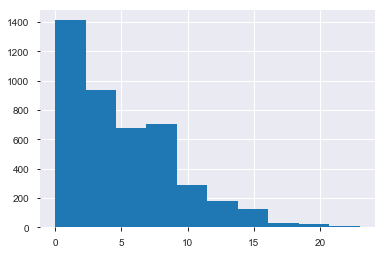

In [34]:
pitching_by_years['YRSPRO'].hist()

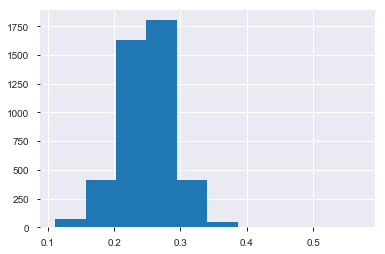

In [35]:
pitching_by_years['BAOpp'].hist()

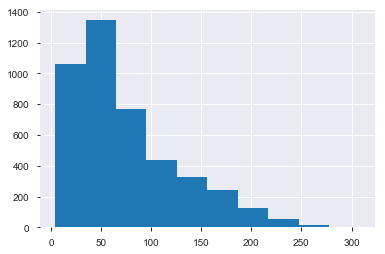

In [36]:
pitching_by_years['SO'].hist()

In [37]:
pitching_by_years._get_numeric_data().columns

Index(['yearID', 'stint', 'W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV', 'IPouts',
       'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp', 'ERA', 'IBB', 'WP', 'HBP', 'BK',
       'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP', 'throws_R', 'bats_R', 'debutYear',
       'currentYear', 'YRSPRO'],
      dtype='object')

In [38]:
change_cols = ['W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV', 'IPouts',
               'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp', 'ERA', 'IBB', 
               'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 
               'GIDP', 'YRSPRO']

# percent_change = batting_by_years[change_cols].pct_change().replace(np.inf, np.nan)

In [39]:
percent_change = pitching_by_years.groupby('playerID')[change_cols].pct_change().replace(np.inf, np.nan)

In [40]:
percent_change.head()

,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,YRSPRO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.00,1.000000,0.880000,NaN,NaN,NaN,NaN,0.505155,0.256410,0.304348,0.00,1.058824,0.361111,-0.106667,-0.132813,-0.333333,0.500000,4.0,NaN,0.509934,0.000000,0.333333,0.500000,1.0,3.0,0.333333
2,-0.25,2.000000,0.553191,NaN,NaN,NaN,NaN,0.465753,0.000000,-0.333333,0.00,-0.028571,0.632653,-0.291045,-0.545946,0.500000,-0.333333,-1.0,NaN,0.298246,6.571429,-0.281250,-0.333333,-0.5,-0.5,0.250000
3,-1.00,0.000000,-0.273973,NaN,NaN,NaN,-0.184211,-0.303738,-0.326531,-0.050000,0.25,-0.264706,-0.387500,0.042105,0.365079,0.666667,0.000000,NaN,NaN,-0.317568,-0.188679,-0.173913,2.500000,0.0,1.5,0.200000
5,NaN,-0.666667,-0.188679,NaN,NaN,NaN,-1.000000,-0.201342,0.181818,0.000000,0.40,-0.240000,-0.265306,0.297980,0.252907,0.200000,-0.500000,1.0,NaN,-0.118812,-0.837209,0.052632,-0.714286,0.0,-0.6,0.500000


In [41]:
# combine pitching_by_years_agg and percent_change into a single dataframe
pitcher_and_change = pd.concat([pitching_by_years, percent_change.rename(columns={
    'W': '_chg', 
    'L': '_chg', 
    'G': '_chg', 
    'GS': '_chg', 
    'CG': '_chg', 
    'SHO': '_chg', 
    'SV': '_chg', 
    'IPouts': '_chg',
    'H': '_chg', 
    'ER': '_chg', 
    'HR': '_chg', 
    'BB': '_chg', 
    'SO': '_chg', 
    'BAOpp': '_chg', 
    'ERA': '_chg', 
    'IBB': '_chg', 
    'WP': '_chg', 
    'HBP': '_chg', 
    'BK': '_chg', 
    'BFP': '_chg', 
    'GF': '_chg', 
    'R': '_chg', 
    'SH': '_chg', 
    'SF': '_chg', 
    'GIDP': '_chg', 
    'YRSPRO': '_chg'
})], axis=1)

In [42]:
# fill nan values with 0
pitcher_and_change.fillna(0, inplace=True)

In [43]:
pitcher_and_change.shape

(4375, 65)

In [42]:
# batter_and_change.to_csv('batter_and_change.csv')

In [44]:
pitcher_and_change.head(20)

,playerID,yearID,teamID,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,debutYear,currentYear,YRSPRO,_chg,_chg,_chg,_chg,_chg,_chg,_chg,_chg,_chg,_chg,_chg,_chg,_chg,_chg,_chg,_chg,_chg,_chg,_chg,_chg,_chg,_chg,_chg,_chg,_chg,_chg
0,aardsda01,2007,CHA,1,2,1,25,0,0,0,0,97,39,23,4,17,36,0.300,6.40,3.0,2,1.0,0,151.0,7,24,2.0,1.0,1.0,David,Aardsma,R,R,2004-04-06,1,1,2004,2007,3,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,aardsda01,2008,BOS,1,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,7,32,3.0,2.0,4.0,David,Aardsma,R,R,2004-04-06,1,1,2004,2008,4,1.00,1.000000,0.880000,0.0,0.0,0.0,0.000000,0.505155,0.256410,0.304348,0.000000,1.058824,0.361111,-0.106667,-0.132813,-0.333333,0.500000,4.000000,0.0,0.509934,0.000000,0.333333,0.500000,1.000000,3.000000,0.333333
2,aardsda01,2009,SEA,1,3,6,73,0,0,0,38,214,49,20,4,34,80,0.190,2.52,3.0,2,0.0,0,296.0,53,23,2.0,1.0,2.0,David,Aardsma,R,R,2004-04-06,1,1,2004,2009,5,-0.25,2.000000,0.553191,0.0,0.0,0.0,0.000000,0.465753,0.000000,-0.333333,0.000000,-0.028571,0.632653,-0.291045,-0.545946,0.500000,-0.333333,-1.000000,0.0,0.298246,6.571429,-0.281250,-0.333333,-0.500000,-0.500000,0.250000
3,aardsda01,2010,SEA,1,0,6,53,0,0,0,31,149,33,19,5,25,49,0.198,3.44,5.0,2,2.0,0,202.0,43,19,7.0,1.0,5.0,David,Aardsma,R,R,2004-04-06,1,1,2004,2010,6,-1.00,0.000000,-0.273973,0.0,0.0,0.0,-0.184211,-0.303738,-0.326531,-0.050000,0.250000,-0.264706,-0.387500,0.042105,0.365079,0.666667,0.000000,0.000000,0.0,-0.317568,-0.188679,-0.173913,2.500000,0.000000,1.500000,0.200000
5,aardsda01,2013,NYN,1,2,2,43,0,0,0,0,119,39,19,7,19,36,0.257,4.31,6.0,1,4.0,1,178.0,7,20,2.0,1.0,2.0,David,Aardsma,R,R,2004-04-06,1,1,2004,2013,9,0.00,-0.666667,-0.188679,0.0,0.0,0.0,-1.000000,-0.201342,0.181818,0.000000,0.400000,-0.240000,-0.265306,0.297980,0.252907,0.200000,-0.500000,1.000000,0.0,-0.118812,-0.837209,0.052632,-0.714286,0.000000,-0.600000,0.500000
6,aardsda01,2015,ATL,1,1,1,33,0,0,0,0,92,25,16,6,14,35,0.223,4.70,3.0,1,1.0,0,129.0,9,17,0.0,1.0,4.0,David,Aardsma,R,R,2004-04-06,1,1,2004,2015,11,-0.50,-0.500000,-0.232558,0.0,0.0,0.0,0.000000,-0.226891,-0.358974,-0.157895,-0.142857,-0.263158,-0.027778,-0.132296,0.090487,-0.500000,0.000000,-0.750000,-1.0,-0.275281,0.285714,-0.150000,-1.000000,0.000000,1.000000,0.222222
7,abadfe01,2010,HOU,1,0,1,22,0,0,0,0,57,14,6,3,5,12,0.200,2.84,0.0,0,0.0,0,76.0,6,6,0.0,1.0,0.0,Fernando,Abad,L,L,2010-07-28,0,0,2010,2010,0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,abadfe01,2011,HOU,1,1,4,29,0,0,0,0,59,28,16,5,9,15,0.326,7.32,0.0,0,1.0,0,99.0,1,18,1.0,2.0,0.0,Fernando,Abad,L,L,2010-07-28,0,0,2010,2011,1,0.00,3.000000,0.318182,0.0,0.0,0.0,0.000000,0.035088,1.000000,1.666667,0.666667,0.800000,0.250000,0.630000,1.577465,0.000000,0.000000,0.000000,0.0,0.302632,-0.833333,2.000000,0.000000,1.000000,0.000000,0.000000
9,abadfe01,2012,HOU,1,0,6,37,6,0,0,0,138,57,26,6,19,38,0.311,5.09,1.0,4,3.0,0,208.0,8,27,2.0,1.0,4.0,Fernando,Abad,L,L,2010-07-28,0,0,2010,2012,2,-1.00,0.500000,0.275862,0.0,0.0,0.0,0.000000,1.338983,1.035714,0.625000,0.200000,1.111111,1.533333,-0.046012,-0.304645,0.000000,0.000000,2.000000,0.0,1.101010,7.000000,0.500000,1.000000,-0.500000,0.000000,1.000000
10,abadfe01,2013,WAS,1,0,3,39,0,0,0,0,113,42,14,3,10,32,0.271,3.35,0.0,0,1.0,0,166.0,17,14,0.0,0.0,0.0,Fernando,Abad,L,L,2010-07-28,0,0,2010,2013,3,0.00,-0.500000,0.054054,-1.0,0.0,0.0,0.000000,-0.181159,-0.263158,-0.461538,-0.500000,-0.473684,-0.157895,-0.128617,-0.341847,-1.000000,-1.000000,-0.666667,0.0,-0.201923,1.125000,-0.481481,-1.000000,-1.000000,-1.000000,0.500000


In [45]:
pitcher_and_change['throws_R'].value_counts(normalize=True)

1    0.719086
0    0.280914
Name: throws_R, dtype: float64

In [45]:
batter_and_change._get_numeric_data().columns

Index(['yearID', 'stint', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'throws_R',
       'bats_R', 'AVE', 'OBP', 'Slug_Percent', 'OPS', 'debutYear',
       'currentYear', 'YRSPRO', 'G_chg', 'AB_chg', 'R_chg', 'H_chg', '2B_chg',
       '3B_chg', 'HR_chg', 'RBI_chg', 'SB_chg', 'CS_chg', 'BB_chg', 'SO_chg',
       'IBB_chg', 'HBP_chg', 'SH_chg', 'SF_chg', 'GIDP_chg', 'AVE_chg',
       'OBP_chg', 'Slug_chg', 'OPS_chg'],
      dtype='object')

In [46]:
# AVE is the target
attributes = ['stint', 'G', 'AB', 'R', 'H', '2B', '3B', 'RBI',
       'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP',
       'throws_R', 'bats_R', 'HR', 'OBP', 'Slug_Percent', 'OPS', 'YRSPRO', 
       'G_chg', 'AB_chg', 'R_chg', 'H_chg', '2B_chg',
       '3B_chg', 'RBI_chg', 'SB_chg', 'CS_chg', 'BB_chg', 'SO_chg',
       'IBB_chg', 'HBP_chg', 'SH_chg', 'SF_chg', 'GIDP_chg', 'HR_chg',
       'OBP_chg', 'Slug_chg', 'OPS_chg']

In [47]:
# create dataframe without target
data_attributes = batter_and_change[attributes]
data_attributes.head(20)

,stint,G,AB,R,H,2B,3B,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,throws_R,bats_R,HR,OBP,Slug_Percent,OPS,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,HR_chg,OBP_chg,Slug_chg,OPS_chg
16,1,35,76,16,15,3,0,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,1,1,2,0.237500,0.315789,0.553289,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17,1,34,55,10,17,5,0,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,1,1,2,0.338983,0.509091,0.848074,2,-0.028571,-0.276316,-0.375000,0.133333,0.666667,0.000000,0.000000,-0.285714,1.000000,-0.500000,0.045455,0.000000,0.000000,0.0,0.000000,-1.000000,0.000000,0.427297,0.612121,0.532785
18,1,158,605,123,171,40,5,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,1,0,16,0.369099,0.444628,0.813727,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19,1,156,609,100,180,39,4,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,1,0,20,0.371345,0.471264,0.842609,12,-0.012658,0.006612,-0.186992,0.052632,-0.025000,-0.200000,-0.009901,-0.120000,0.375000,-0.130952,-0.052174,0.000000,-0.666667,0.0,-0.857143,0.272727,0.250000,0.006086,0.059907,0.035494
20,1,152,563,96,165,29,3,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,1,0,15,0.389805,0.435169,0.824974,13,-0.025641,-0.075534,-0.040000,-0.083333,-0.256410,-0.250000,0.030000,0.363636,-0.272727,0.287671,0.036697,2.500000,0.000000,0.0,8.000000,0.071429,-0.250000,0.049711,-0.076593,-0.020930
21,1,154,573,88,146,41,1,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,1,0,20,0.352324,0.434555,0.786879,14,0.013158,0.017762,-0.083333,-0.115152,0.413793,-0.666667,-0.242718,-0.200000,0.250000,-0.074468,0.168142,-0.571429,1.000000,0.0,-0.444444,-0.133333,0.333333,-0.096154,-0.001410,-0.046177
22,1,142,502,54,127,30,1,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,1,0,8,0.352740,0.364542,0.717282,15,-0.077922,-0.123909,-0.386364,-0.130137,-0.268293,0.000000,-0.230769,-0.125000,-0.500000,-0.103448,-0.143939,0.666667,-0.500000,0.0,-0.400000,-0.384615,-0.600000,0.001180,-0.161115,-0.088447
24,2,92,195,28,48,8,1,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,1,0,3,0.360870,0.343590,0.704459,16,-0.352113,-0.611554,-0.481481,-0.622047,-0.733333,0.000000,-0.683333,-0.714286,-0.600000,-0.551282,-0.548673,-0.400000,-1.000000,-1.0,-1.000000,-0.250000,-0.625000,0.023048,-0.057475,-0.017876
25,1,78,133,12,33,9,0,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,1,0,1,0.341935,0.338346,0.680281,18,-0.152174,-0.317949,-0.571429,-0.312500,0.125000,-1.000000,-0.263158,-0.833333,-1.000000,-0.428571,-0.588235,-1.000000,0.000000,0.0,0.000000,-0.500000,-0.666667,-0.052468,-0.015262,-0.034321
26,1,145,556,80,176,35,2,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,1,1,36,0.382637,0.580935,0.963572,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [48]:
from sklearn.preprocessing import StandardScaler

In [50]:
ss = StandardScaler()
X_sc = ss.fit_transform(data_attributes)

C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [51]:
# import kmeans
from sklearn.cluster import KMeans
from sklearn import metrics

In [52]:
# create silhouette score dict
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=42)
    l = km.fit_predict(X_sc)
    s_score = metrics.silhouette_score(X_sc, l)
    s_score_dict[i] = [s_score]
    
s_score_dict

{2: [0.25684983893453167],
 3: [0.2533772813256647],
 4: [0.11754935103266262],
 5: [0.09959337313672469],
 6: [0.10703619717411576],
 7: [0.10741007289318119],
 8: [0.10458230712492576],
 9: [0.11181889461628111],
 10: [0.0869992087106096]}

In [53]:
kmeans_model = KMeans(n_clusters=6, random_state=42)
distances = kmeans_model.fit_transform(X_sc)
labels = kmeans_model.labels_

In [54]:
labels

array([0, 0, 2, ..., 5, 0, 5])

In [55]:
batter_and_change['KMeans_label'] = labels
attributes.append('KMeans_label')

batter_and_change.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg,KMeans_label
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.197368,0.237500,0.315789,0.553289,2006,2007,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.309091,0.338983,0.509091,0.848074,2006,2008,2,-0.028571,-0.276316,-0.375000,0.133333,0.666667,0.000000,0.000000,0.000000,-0.285714,1.000000,-0.500000,0.045455,0.000000,0.000000,0.0,0.000000,-1.000000,0.566061,0.427297,0.612121,0.532785,0
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.282645,0.369099,0.444628,0.813727,1996,2007,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.295567,0.371345,0.471264,0.842609,1996,2008,12,-0.012658,0.006612,-0.186992,0.052632,-0.025000,-0.200000,0.250000,-0.009901,-0.120000,0.375000,-0.130952,-0.052174,0.000000,-0.666667,0.0,-0.857143,0.272727,0.045718,0.006086,0.059907,0.035494,2
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.293073,0.389805,0.435169,0.824974,1996,2009,13,-0.025641,-0.075534,-0.040000,-0.083333,-0.256410,-0.250000,-0.250000,0.030000,0.363636,-0.272727,0.287671,0.036697,2.500000,0.000000,0.0,8.000000,0.071429,-0.008437,0.049711,-0.076593,-0.020930,2
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.254799,0.352324,0.434555,0.786879,1996,2010,14,0.013158,0.017762,-0.083333,-0.115152,0.413793,-0.666667,0.333333,-0.242718,-0.200000,0.250000,-0.074468,0.168142,-0.571429,1.000000,0.0,-0.444444,-0.133333,-0.130594,-0.096154,-0.001410,-0.046177,2
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.252988,0.352740,0.364542,0.717282,1996,2011,15,-0.077922,-0.123909,-0.386364,-0.130137,-0.268293,0.000000,-0.600000,-0.230769,-0.125000,-0.500000,-0.103448,-0.143939,0.666667,-0.500000,0.0,-0.400000,-0.384615,-0.007109,0.001180,-0.161115,-0.088447,2
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.246154,0.360870,0.343590,0.704459,1996,2012,16,-0.352113,-0.611554,-0.481481,-0.622047,-0.733333,0.000000,-0.625000,-0.683333,-0.714286,-0.600000,-0.551282,-0.548673,-0.400000,-1.000000,-1.0,-1.000000,-0.250000,-0.027014,0.023048,-0.057475,-0.017876,0
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.248120,0.341935,0.338346,0.680281,1996,2014,18,-0.152174,-0.317949,-0.571429,-0.312500,0.125000,-1.000000,-0.666667,-0.263158,-0.833333,-1.000000,-0.428571,-0.588235,-1.000000,0.000000,0.0,0.000000,-0.500000,0.007989,-0.052468,-0.015262,-0.034321,0
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,Jose,Abreu,R,R,2014-03-31,1,1,0.316547,0.382637,0.580935,0.963572,2014,2014,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [56]:
batter_and_change['KMeans_label'].value_counts()

0    2515
5    1599
2    1121
3     943
1     521
4      67
Name: KMeans_label, dtype: int64

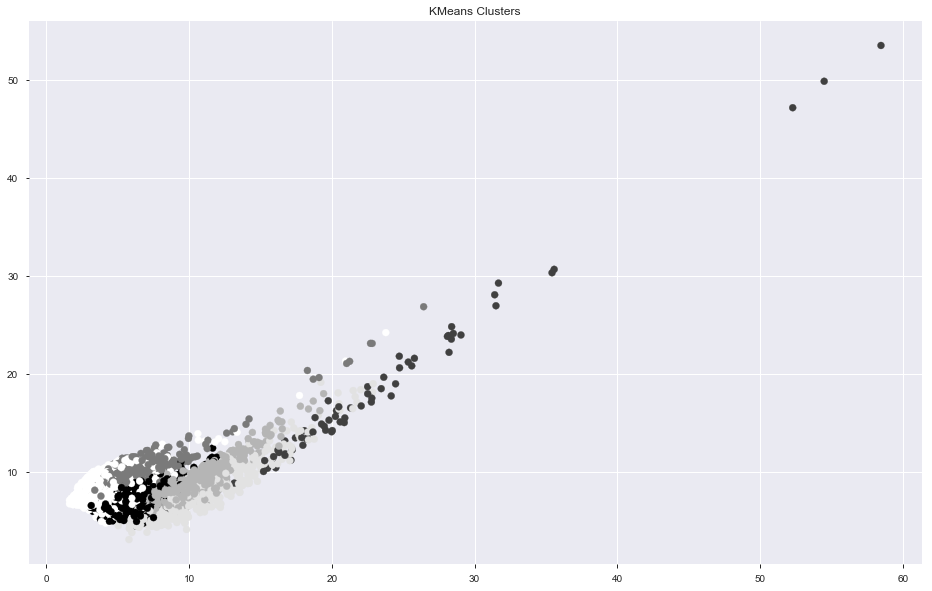

In [57]:
# create a scatter plot using labels from KMeans model as color
plt.figure(figsize=(16,10))
plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('KMeans Clusters')

plt.show()

In [58]:
batter_and_change[batter_and_change['KMeans_label'] == 4]

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg,KMeans_label
132,ahmedni01,2015,ARI,1,134,421,49,95,17,6,9,34.0,4.0,5.0,29,81.0,1.0,1.0,5.0,3.0,4.0,Nick,Ahmed,R,R,2014-06-29,1,1,0.225653,0.275330,0.358670,0.634000,2014,2015,1,4.360000,5.014286,4.444444,5.785714,7.500000,0.0,8.000000,7.500000,0.000000,4.000000,8.666667,7.100000,0.000000,0.000000,1.5,0.0,1.000000,0.128266,0.182301,0.321415,0.257175,4
271,amarial01,2012,SDN,2,105,275,35,66,15,5,5,32.0,8.0,4.0,17,42.0,1.0,0.0,6.0,2.0,2.0,Alexi,Amarista,L,R,2011-04-26,1,0,0.240000,0.282313,0.385455,0.667767,2011,2012,1,3.565217,4.288462,16.500000,7.250000,4.000000,4.0,0.000000,5.400000,0.000000,0.000000,7.500000,4.250000,0.000000,0.000000,5.0,1.0,1.000000,0.560000,0.552721,0.541818,0.546409,4
596,baezja01,2016,CHN,1,142,421,50,115,19,1,14,59.0,12.0,3.0,15,108.0,3.0,11.0,1.0,2.0,8.0,Javier,Baez,R,R,2014-08-05,1,1,0.273159,0.314031,0.422803,0.736834,2014,2016,2,4.071429,4.539474,11.500000,4.227273,2.166667,0.0,13.000000,13.750000,11.000000,0.500000,2.750000,3.500000,2.000000,0.000000,0.0,0.0,0.000000,-0.056359,-0.033750,0.036549,0.005375,4
728,barmecl01,2008,COL,1,107,393,47,114,25,6,11,44.0,13.0,4.0,17,69.0,0.0,2.0,4.0,1.0,9.0,Clint,Barmes,R,R,2003-09-05,1,1,0.290076,0.322034,0.468193,0.790227,2003,2008,5,2.962963,9.621622,8.400000,13.250000,7.333333,0.0,0.000000,43.000000,0.000000,0.000000,16.000000,4.307692,-1.000000,0.000000,3.0,0.0,8.000000,0.341603,0.359699,0.574832,0.479440,4
738,barneau01,2017,LAN,1,102,218,35,63,15,2,8,38.0,4.0,1.0,39,43.0,1.0,5.0,0.0,0.0,6.0,Austin,Barnes,R,R,2015-05-24,1,1,0.288991,0.408397,0.486239,0.894635,2015,2017,2,3.857143,5.812500,10.666667,11.600000,14.000000,0.0,0.000000,18.000000,0.000000,0.000000,6.800000,3.777778,0.000000,0.000000,0.0,0.0,0.000000,0.849541,0.511069,1.593272,0.954333,4
745,barneda01,2011,CHN,1,143,529,66,146,23,6,2,43.0,9.0,2.0,22,67.0,2.0,8.0,7.0,4.0,14.0,Darwin,Barney,R,R,2010-08-12,1,1,0.275992,0.312611,0.353497,0.666108,2010,2011,1,3.766667,5.696203,4.500000,6.684211,4.750000,0.0,0.000000,20.500000,0.000000,0.000000,2.666667,4.583333,0.000000,0.000000,0.0,0.0,0.000000,0.147548,0.062877,0.214186,0.138147,4
752,barneda01,2016,TOR,1,104,279,35,75,13,2,4,19.0,2.0,2.0,22,48.0,1.0,1.0,2.0,2.0,8.0,Darwin,Barney,R,R,2010-08-12,1,1,0.268817,0.322368,0.372760,0.695128,2010,2016,6,3.727273,7.454545,4.833333,6.500000,12.000000,0.0,3.000000,1.714286,0.000000,0.000000,1.750000,15.000000,0.000000,-0.666667,0.0,1.0,0.000000,-0.112903,-0.309211,-0.121352,-0.219754,4
855,bautijo02,2009,TOR,1,113,336,54,79,13,3,13,40.0,4.0,0.0,56,85.0,1.0,4.0,6.0,2.0,9.0,Jose,Bautista,R,R,2004-04-04,1,1,0.235119,0.349246,0.407738,0.756984,2004,2009,5,4.380952,5.000000,6.714286,5.583333,5.500000,0.0,3.333333,3.000000,0.000000,0.000000,27.000000,5.071429,0.000000,0.000000,2.0,1.0,3.500000,0.097222,0.471823,-0.007246,0.168181,4
1095,berkmla01,2011,SLN,1,145,488,90,147,23,2,31,94.0,2.0,6.0,92,93.0,17.0,3.0,0.0,4.0,7.0,Lance,Berkman,B,L,1999-07-16,0,0,0.301230,0.412266,0.547131,0.959397,1999,2011,12,2.918919,3.603774,9.000000,4.444444,2.285714,0.0,30.000000,9.444444,0.000000,0.000000,4.411765,5.200000,4.666667,0.000000,0.0,0.0,0.166667,0.182605,0.152470,0.567457,0.357419,4
1100,bernaro01,2010,WAS,1,134,414,52,102,18,3,11,47.0,16.0,2.0,35,93.0,1.0,4.0,2.0,6.0,3.0,Roger,Bernadina,L,L,2008-06-29,0,0,0.246377,0.307190,0.384058,0.691248,2008,2010,2,4.153846,4.447368,4.200000,5.375000,17.000000,2.0,0.000000,22.500000,3.000000,-0.333333,2.888889,3.428571,0.000000,0.000000,1.0,0.0,0.000000,0.170290,0.044444,0.536232,0.270401,4


In [59]:
batter_and_change['yearID'].value_counts()

2011    637
2012    636
2015    624
2010    621
2014    613
2017    612
2013    609
2007    605
2008    605
2009    602
2016    602
Name: yearID, dtype: int64

In [60]:
batter_and_change['playerID'].value_counts()

gomezca01    13
pencehu01    13
beltrca01    13
johnske05    13
bournmi01    13
hillaa01     13
drewst01     13
encared01    12
uribeju01    12
bruceja01    12
reynoma01    12
gonzaad01    12
davisra01    12
aybarer01    12
peraljh01    12
pradoma01    12
byrdma01     12
suzukic01    12
pearcst01    12
zobribe01    12
francje02    12
uptonju01    12
cabreme01    12
callaal01    12
tulowtr01    12
phillbr01    12
suzukku01    12
deazaal01    12
bautijo02    12
reyesjo01    12
             ..
bellico01     1
cingrto01     1
brentbr01     1
melhuad01     1
silvaca01     1
reyesan01     1
lopezra02     1
cartech01     1
winkeje01     1
adamsru01     1
gsellro01     1
fickro01      1
kimby01       1
myrowbr01     1
bassan01      1
jimenlu02     1
mirabdo01     1
stripro01     1
ryanmi03      1
hughelu01     1
cardust01     1
lametdi01     1
bennega01     1
urenari01     1
mazalu01      1
bussni01      1
scrugxa01     1
sloweke01     1
hudsoda01     1
straury01     1
Name: playerID, Length: 

Modeling

In [61]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [62]:
# imports
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [63]:
# set X and y
X = batter_and_change[attributes]
y = batter_and_change['AVE']

Linear Regression

In [64]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.9435417542288608


In [66]:
# gridsearch for best parameters

gs_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

lr_gridsearch = GridSearchCV(
    LinearRegression(),
    gs_params,
    cv=5,
    n_jobs=4,
    verbose=1
)

In [67]:
lr_gridsearch = lr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    3.1s finished


In [68]:
# Best parameters on the training data:
lr_gridsearch.best_params_

{'fit_intercept': True, 'normalize': True}

In [69]:
# accuracy score on train data
print(lr_gridsearch.best_score_)

# assign the best estimator to a variable:
best_lr = lr_gridsearch.best_estimator_

# accuracy score on test data
print(best_lr.score(X_test, y_test))

0.9412848558331255
0.9435417542288604


In [70]:
lrpreds = best_lr.predict(X_test)

In [71]:
lrpreds

array([0.00457561, 0.25504824, 0.28295432, ..., 0.2151753 , 0.1432707 ,
       0.25520182])

In [72]:
y_test

1082     0.000000
14981    0.238889
497      0.282555
9776     0.263314
1234     0.253968
6852     0.230444
3299     0.238095
329      0.210145
15513    0.283537
9955     0.289855
5432     0.303030
5334     0.093750
13722    0.247788
145      0.142857
1235     0.252033
10363    0.255319
2359     0.201754
13446    0.285425
12690    0.288703
9167     0.172662
1108     0.226415
6288     0.294118
8115     0.301325
3655     0.204545
4679     0.225424
559      0.237113
2480     0.219858
1923     0.300987
3859     0.252918
14568    0.290123
           ...   
6776     0.259259
4315     0.231250
2660     0.241758
12572    0.224576
4154     0.304000
7069     0.286598
5947     0.071429
10726    0.253968
2445     0.291667
6524     0.230563
8427     0.187500
2662     0.241573
5944     0.148936
5203     0.236842
9472     0.166667
8857     0.213333
12528    0.133333
9915     0.248193
11743    0.206897
6283     0.289855
4388     0.246667
8798     0.280289
1375     0.131579
8889     0.273859
7827     0

In [73]:
results = pd.DataFrame()
results['y_true'] = y_test
results['lrpreds'] = lrpreds
results.head()

,y_true,lrpreds
1082,0.000000,0.004576
14981,0.238889,0.255048
497,0.282555,0.282954
9776,0.263314,0.258676
1234,0.253968,0.243763


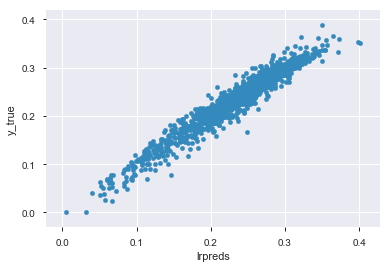

In [74]:
results.plot('lrpreds', 'y_true', kind='scatter')

Ridge

In [75]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.fit_transform(X_test)

C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [76]:
ridge = Ridge()
ridge.fit(X_train_sc, y_train)
print(ridge.score(X_test_sc, y_test))

0.9428899907243384


In [77]:
# gridsearch for best parameters

gs_params = {
    'alpha': [1, 10, 100, 1000],
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

ridge_gridsearch = GridSearchCV(
    Ridge(),
    gs_params,
    cv=5,
    n_jobs=4,
    verbose=1
)

In [78]:
ridge_gridsearch = ridge_gridsearch.fit(X_train_sc, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.5s finished


In [79]:
# Best parameters on the training data:
ridge_gridsearch.best_params_

{'alpha': 1, 'fit_intercept': True, 'normalize': False}

In [80]:
# accuracy score on train data
print(ridge_gridsearch.best_score_)

# assign the best estimator to a variable:
best_ridge = ridge_gridsearch.best_estimator_

# accuracy score on test data
print(best_ridge.score(X_test_sc, y_test))

0.9413082036322565
0.9428899907243384


In [81]:
ridgepreds = best_ridge.predict(X_test_sc)

In [82]:
results['ridgepreds'] = ridgepreds
results.head()

,y_true,lrpreds,ridgepreds
1082,0.000000,0.004576,-0.000598
14981,0.238889,0.255048,0.254326
497,0.282555,0.282954,0.282727
9776,0.263314,0.258676,0.258374
1234,0.253968,0.243763,0.244123


Lasso

In [83]:
lasso = Lasso()
lasso.fit(X_train_sc, y_train)
print(lasso.score(X_test_sc, y_test))

-0.00011112499373333584


In [84]:
# gridsearch for best parameters

gs_params = {
    'alpha': [0.001, 0.01, 0.1],
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': [50, 500, 1000, 10000]
}

lasso_gridsearch = GridSearchCV(
    Lasso(),
    gs_params,
    cv=5,
    n_jobs=4,
    verbose=1
)

In [85]:
lasso_gridsearch = lasso_gridsearch.fit(X_train_sc, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:    3.1s finished
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [93]:
# Best parameters on the training data:
lasso_gridsearch.best_params_

{'alpha': 0.001, 'fit_intercept': True, 'max_iter': 50, 'normalize': False}

In [94]:
# accuracy score on train data
print(lasso_gridsearch.best_score_)

# assign the best estimator to a variable:
best_lasso = lasso_gridsearch.best_estimator_

# accuracy score on test data
print(best_lasso.score(X_test_sc, y_test))

0.9299129658966001
0.931867303290036


In [95]:
lassopreds = best_lasso.predict(X_test_sc)

In [96]:
results['lassopreds'] = lassopreds
results.head(20)

,y_true,lrpreds,ridgepreds,enetpreds,lassopreds
1082,0.000000,0.004576,-0.000598,-0.004210,0.002256
14981,0.238889,0.255048,0.254326,0.254623,0.258712
497,0.282555,0.282954,0.282727,0.282117,0.277695
9776,0.263314,0.258676,0.258374,0.259740,0.255617
1234,0.253968,0.243763,0.244123,0.245300,0.244205
6852,0.230444,0.230937,0.229914,0.232641,0.227638
3299,0.238095,0.225726,0.224761,0.224209,0.228457
329,0.210145,0.200289,0.199150,0.197592,0.197871
15513,0.283537,0.295031,0.295737,0.292948,0.285627
9955,0.289855,0.266567,0.266492,0.264962,0.258287


Elastic Net

In [86]:
enet = ElasticNet()
enet.fit(X_train_sc, y_train)
print(enet.score(X_test_sc, y_test))

-0.00011112499373333584


In [87]:
# gridsearch for best parameters

gs_params = {
    'alpha': [0.001, 0.01, 0.1],
    'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9],
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': [50, 500, 1000, 10000]
}

enet_gridsearch = GridSearchCV(
    ElasticNet(),
    gs_params,
    cv=5,
    n_jobs=4,
    verbose=1
)

In [88]:
enet_gridsearch = enet_gridsearch.fit(X_train_sc, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 180 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 825 tasks      | elapsed:   19.6s
[Parallel(n_jobs=4)]: Done 1200 out of 1200 | elapsed:   22.1s finished
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [89]:
# Best parameters on the training data:
enet_gridsearch.best_params_

{'alpha': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.1,
 'max_iter': 500,
 'normalize': False}

In [90]:
# accuracy score on train data
print(enet_gridsearch.best_score_)

# assign the best estimator to a variable:
best_enet = enet_gridsearch.best_estimator_

# accuracy score on test data
print(best_enet.score(X_test_sc, y_test))

0.9402864382287863
0.941927216115366


In [91]:
enetpreds = best_enet.predict(X_test_sc)

In [97]:
results['enetpreds'] = enetpreds
results.head(20)

,y_true,lrpreds,ridgepreds,enetpreds,lassopreds
1082,0.000000,0.004576,-0.000598,-0.004210,0.002256
14981,0.238889,0.255048,0.254326,0.254623,0.258712
497,0.282555,0.282954,0.282727,0.282117,0.277695
9776,0.263314,0.258676,0.258374,0.259740,0.255617
1234,0.253968,0.243763,0.244123,0.245300,0.244205
6852,0.230444,0.230937,0.229914,0.232641,0.227638
3299,0.238095,0.225726,0.224761,0.224209,0.228457
329,0.210145,0.200289,0.199150,0.197592,0.197871
15513,0.283537,0.295031,0.295737,0.292948,0.285627
9955,0.289855,0.266567,0.266492,0.264962,0.258287
